# CDF CALCULATION
---
July 5th, 2023 @irfansmf

---

### Import Module

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.distributions.empirical_distribution import ECDF

To calculate CDF, we use _"statsmodels"_ module ==> ECDF

### CDF Calculation

In [3]:
df = pd.read_excel('Data/Precipitation Station Data.xlsx')
df.head(5)

,Time,CH
0,2018-11-30 23:10,0.0
1,2018-11-30 23:20,0.0
2,2018-11-30 23:30,0.0
3,2018-11-30 23:40,0.0
4,2018-11-30 23:50,0.0


In [4]:
# Choosing date
sdate = '2019-02-01 00:00'
edate = '2019-04-01 00:00'

# Finding daily precipitation
idx1 = df[df['Time']== sdate].index.values[0]
idx2 = df[df['Time']== edate].index.values[0]
data = df['CH'][idx1:idx2].values
ch_rs = np.reshape(data, (int(data.shape[0]/(6*24)), 6*24))
ch_rs = np.sum(ch_rs, axis=1)

In [5]:
# Finding CDF 80% - 95%
ecdf = ECDF(ch_rs)
cdf80 = ecdf.x[ecdf.y > 0.80][0]
cdf85 = ecdf.x[ecdf.y > 0.85][0]
cdf90 = ecdf.x[ecdf.y > 0.90][0]
cdf95 = ecdf.x[ecdf.y > 0.95][0]

In [6]:
cdf80, cdf85, cdf90, cdf95

(16.5, 21.0, 27.5, 39.5)

### Plot

Text(1.0, 1.0, 'CDF of Station 1')

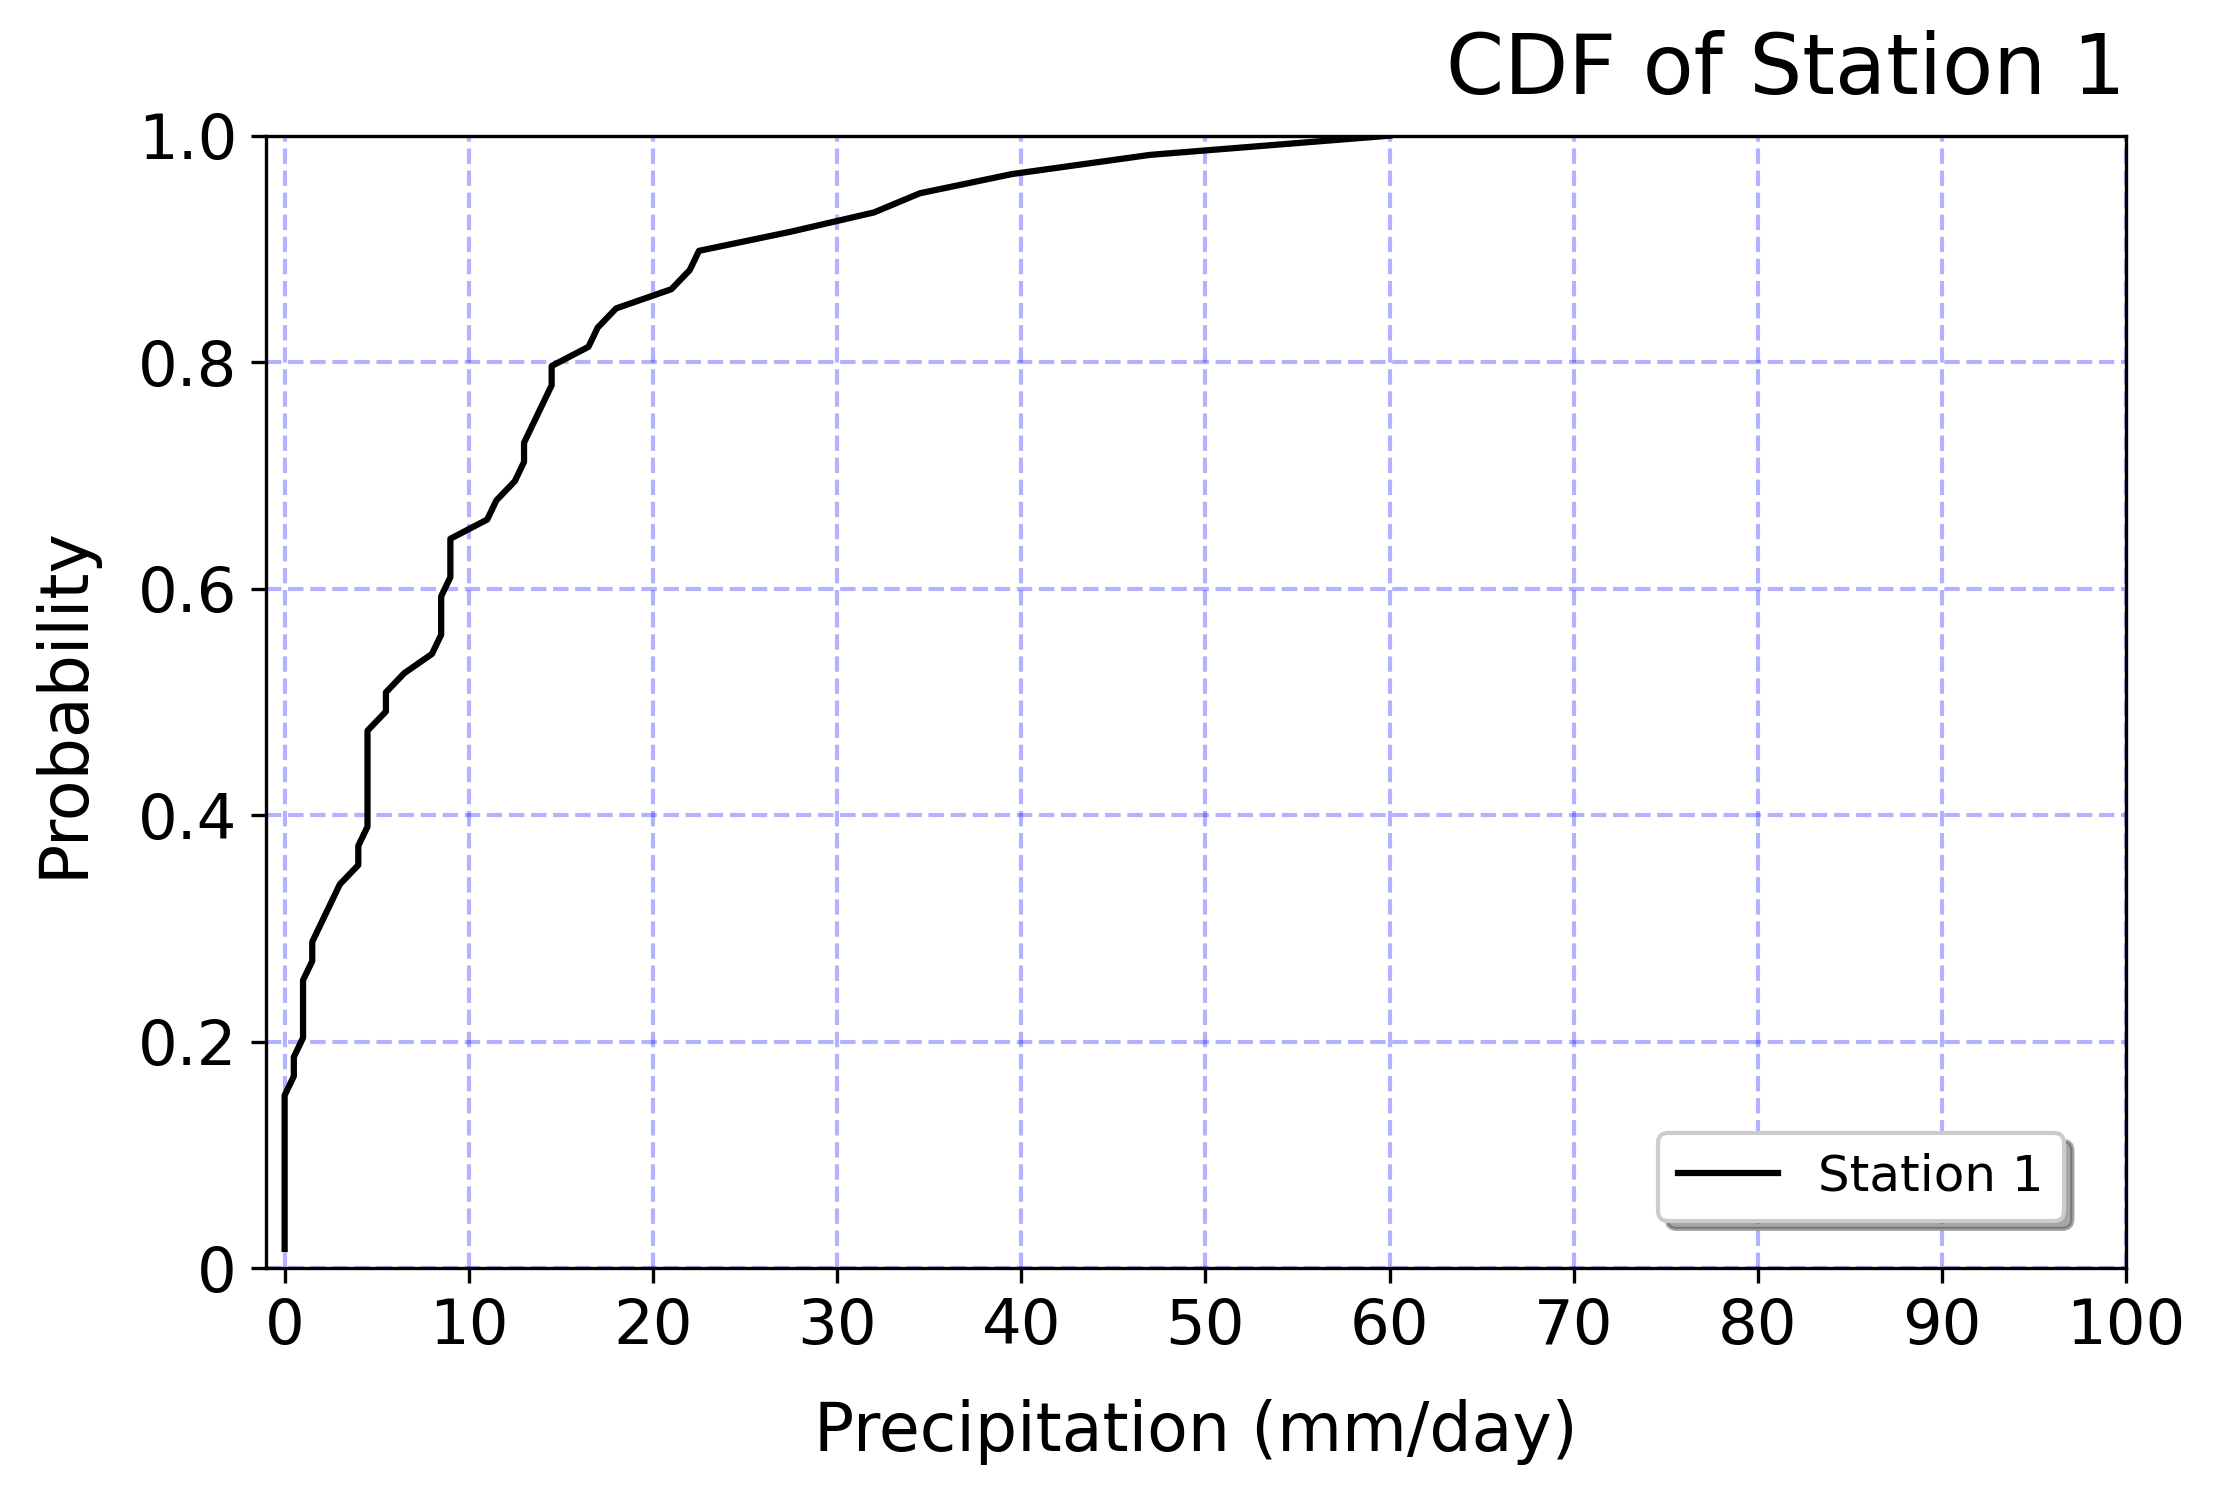

In [7]:
fig, ax = plt.subplots(figsize=(8,5), dpi=300)

ax.plot(ecdf.x, ecdf.y, color='k', linewidth=1.5, label='Station 1')

legend = ax.legend(loc='lower right', shadow=True, fontsize='large', bbox_to_anchor=(0.98, 0.02))
ax.set_xlabel('Precipitation (mm/day)',fontsize=16, labelpad=10)
ax.set_ylabel('Probability',fontsize=16,labelpad=10)
ax.grid(color='b', alpha=0.3, linestyle='dashed', linewidth=1)
plt.xticks(list(np.arange(0,110,10)), ['0','10','20','30','40','50','60','70','80','90','100'], fontsize=15)
plt.yticks(list(np.arange(0,1.1,0.2)), ['0','0.2','0.4','0.6','0.8','1.0'], fontsize=15)
plt.ylim(0,1.)
plt.xlim(-1,100)

plt.title('CDF of Station 1', fontsize=20, loc='right', pad=10)

#fig.savefig('FM19 - CDF 12 Station.png',dpi=300,orientation='landscape', bbox_inches='tight')